In [2]:
import numpy as np
import pandas as pd
from ISLP import load_data
from ISLP.models import ModelSpec, summarize, poly
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from statsmodels.stats.anova import anova_lm

from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF

In [3]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10

b0 = 2
b1 = 2
b2 = 0.3
y = b0 + b1*x1 + b2*x2 + rng.normal(size=100)


(array([ 5.,  9., 16., 20., 14., 13., 11.,  7.,  4.,  1.]),
 array([-0.12413157, -0.04434471,  0.03544216,  0.11522903,  0.19501589,
         0.27480276,  0.35458963,  0.43437649,  0.51416336,  0.59395023,
         0.67373709]),
 <BarContainer object of 10 artists>)

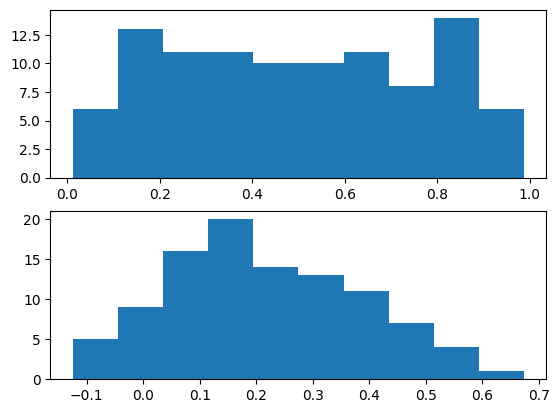

In [4]:
axs = subplots(2, 1)[1]
axs[0].hist(x1)
axs[1].hist(x2)

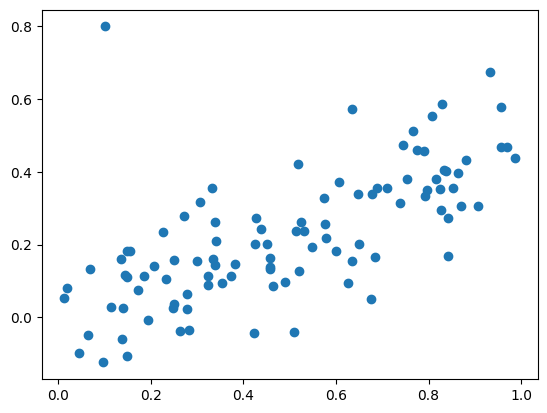

In [23]:
ax = subplots()[1]
ax.scatter(x1, x2)

In [6]:
X = np.concatenate((x1, x2)).reshape(-1, 2)
X = ModelSpec([0, 1]).fit_transform(X)
result = sm.OLS(y, X).fit()

print(f"b0 = {result.params[0]:.4f} vs true b0 = {b0}")
print(f"b1 = {result.params[1]:.4f} vs true b1 = {b1}")
print(f"b2 = {result.params[2]:.4f} vs true b2 = {b2}")

print(f"{result.rsquared=}")
summarize(result)

b0 = 2.8750 vs true b0 = 2
b1 = 0.7576 vs true b1 = 2
b2 = -0.4624 vs true b2 = 0.3
result.rsquared=0.03529600151204626


,coef,std err,t,P>|t|
const,2.8750,0.206,13.928,0.000
x1,0.7576,0.426,1.779,0.078
x2,-0.4624,0.412,-1.124,0.264


We can't reject H0: b1 = 0, nor H0: b2 = 0, because of p value being so big.

In [7]:
# ONLY x1

X = x1.reshape(-1, 1)
X = ModelSpec([0]).fit_transform(X)
result = sm.OLS(y, X).fit()

print(f"b0 = {result.params[0]:.4f} vs true b0 = {b0}")
print(f"b1 = {result.params[1]:.4f} vs true b1 = {b1}")

print(f"{result.rsquared=}")
summarize(result)

b0 = 1.9371 vs true b0 = 2
b1 = 2.0771 vs true b1 = 2
result.rsquared=0.2814635507431502


,coef,std err,t,P>|t|
const,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


In [8]:
# ONLY x2

X = x2.reshape(-1, 1)
X = ModelSpec([0]).fit_transform(X)
result = sm.OLS(y, X).fit()

print(f"b0 = {result.params[0]:.4f} vs true b0 = {b0}")
print(f"b1 = {result.params[1]:.4f} vs true b1 = {b2}")

print(f"{result.rsquared=}")
summarize(result)

b0 = 2.3239 vs true b0 = 2
b1 = 2.9103 vs true b1 = 0.3
result.rsquared=0.22217640363594238


,coef,std err,t,P>|t|
const,2.3239,0.154,15.124,0.0
x1,2.9103,0.550,5.291,0.0


In [9]:
# EXTRA POINT (miss-measured)

x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])


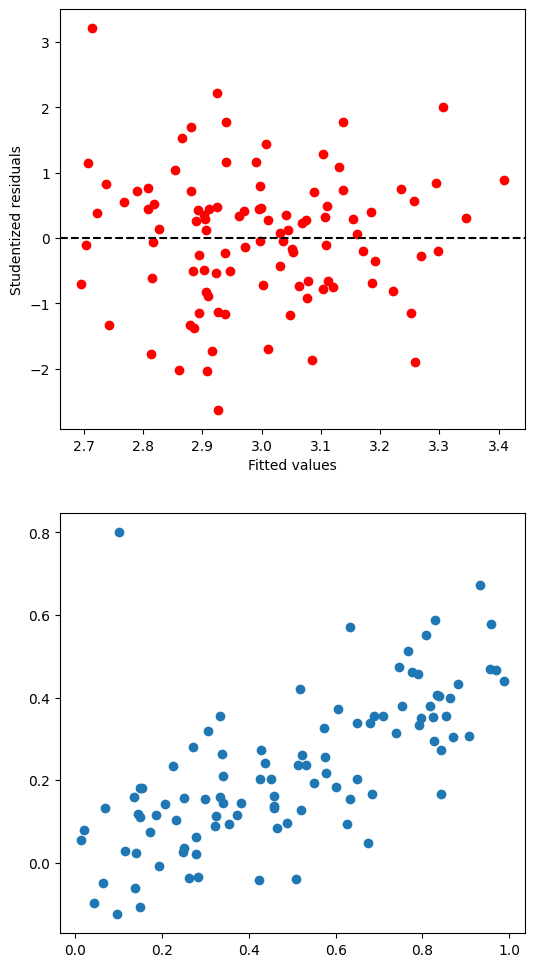

In [29]:
X = np.concatenate((x1, x2)).reshape(-1, 2)
X = ModelSpec([0, 1]).fit_transform(X)
result = sm.OLS(y, X).fit()

# result.outlier_test()[:, 0].shape
axs = subplots(2, 1, figsize=(6, 12))[1]
ax = axs[0]
ax.scatter(result.fittedvalues, result.outlier_test()[:, 0], c="r")
ax.axhline(0, c="k", ls="--")
ax.set_xlabel("Fitted values")
ax.set_ylabel("Studentized residuals")

ax = axs[1]
ax.scatter(x1, x2)
